# Music Genre Classification

## Understanding Audio Data

### Sound

**Sound** is produced when an object vibrates; the vibration determines the oscillation of a molecule that produces pressure. 

The alternation of pressures creates a **wave**, that can be represented in a **waveform**.

<img src="images/notebook/waveform.jpg" width="400"/>

The wave can be represented by its **amplitude** over **time**: it can be seen as a point that oscillates with different amplitudes at different times. 

Another important property of waves is their **period**: it represents when we have the "start" of the same wave (e.g. in the picture it represents the interval between two same **peaks** of the wave).

The period is strictly correlated with **frequency**, indeed $ f = \frac{1}{T} $, where $T$ is the **period**. 

To describe a wave we also need the **amplitude**, which is given by the distance of a point from the zero amplitude. 

Given all these properties, a waveform can be described by the **function**:

<center>$y(t) = A sin (2 \pi f t + \varphi)$</center>

where $A$ is the amplitude, $f$ is the frequency and $\varphi$ is the **phase** which represents the shift of the wave. 

Perceptually, humans perceive:

- high pitch in the sound when the wave as high frequency 
- louder sound when the wave as larger amplitude

### Analog Digital Conversion (ADC)

When we are considering **acoustic sound**, like the sound of a piano or an instrument in general, we are talking about **continuous** or **analog** waveforms. 

To store this kind of waves, we need to digitalize them. One procedure is the **ADC** (Analog Digital Conversion).

- **Sampling**: first, the signal is sampled at uniform time intervals. The interval is given by the **sample rate** (amount of sample in a second).

- **Quantization**: finally the amplitude is quantized with limited number of bits. In details, for each sample, the corresponding amplitude is projected onto the closer quantized bit. Clearly, more bit to store the amplitude means a better quality of the representation: this gives the **bit depth**.


<img src="images/notebook/adc.png" width="400"/>


For example with a CD-ROM we have a **sample rate** of 44.100 Hz and the **bit depth** is 16 bits per channel. 

But when considering  **real-world** sound waves, it turns out that these are more complex than the previous represented ones. 

### Fourier Transform

Let's take for example one of the track from our dataset.


In [8]:
# import module

import os
import librosa, librosa.display
import math
import json
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# path module

CURRENT_DIR = os.path.abspath(os.getcwd())
DATASET_PATH = os.path.join(os.path.join(CURRENT_DIR, "Data"), "genres_original")
JSON_PATH = os.path.join(os.path.join(CURRENT_DIR, "JSON"), "data.json")

SAMPLE_PATH = os.path.join(os.path.join(DATASET_PATH,"blues"), "blues.00000.wav")

In [10]:
def plot_waveform(file):
    # signal: numpy array with # values = sr * T -> 22050 * 30 seconds
    signal, sr = librosa.load(file, sr=22050) # standard sample rate
    librosa.display.waveplot(signal, sr=sr)
    
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.show() 
    
    return signal, sr

And let's plot its **waveform**.

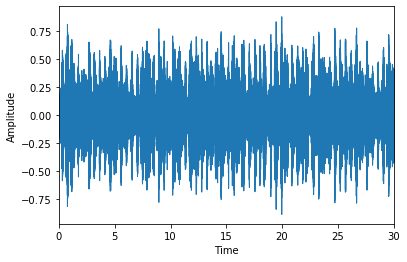

In [11]:
signal, sr = plot_waveform(SAMPLE_PATH)

As we can see it's more complex than the waveform showed before. 

But actually, we can know more about complex sounds thanks to the **Fourier Transform**. The Fourier Transform decomposes complex periodic sound into a sum (**superposition**) of sine waves oscillating at different *frequencies* and different *amplitudes*.

Applying a Fourier Transform we obtain a **Power Spectrum** that gives as the magnitude (power) as a function of the frequency. Let's consider previous samples:

In [18]:
def plot_FFT(signal, sr):
    fft = np.fft.fft(signal)
    
    magnitude = np.abs(fft)
    frequency = np.linspace(0, sr, len(magnitude))
    
    left_frequency = frequency[:int(len(frequency)/2)]
    left_magnitude = magnitude[:int(len(magnitude)/2)]
    
    plt.plot(left_frequency, left_magnitude)
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")
    plt.show() 

And let's plot is **Fast Fourier Transform**:

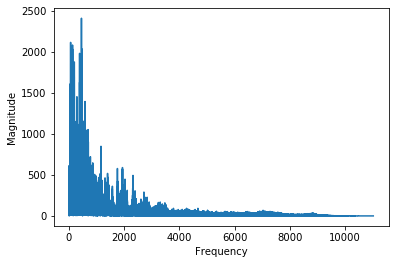

In [19]:
plot_FFT(signal, sr)

We can see that most of the energy is concentrated in the **lower frequencies** and that as the frequency increases, the power goes lower and lower. 

We have to consider that:
- we are moving from the *time domain* to the *frequency domain*.
- there is no time information.

So we need a way to preserve time information.

### Short Time Fourier Transform (STFT)

The **STFT** (Short Time Fourier Transform) computes several FFT at different intervals, preserving time information. The different intervals are givend by a fixed **frame size** (e.g. 2048 samples).

This procedure gives us a **spectrogram** which represents the magnitude as a function of both frequency and time. 

As before, let's consider our sample:

In [25]:
def plot_STFT(signal, sr):
    n_fft = 2048
    hop_length = 512 # amount we are shifting each FFT to the right
    
    stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
    spectrogram = np.abs(stft)
    # for visualization purpose (to decibel)
    log_spectrogram = librosa.amplitude_to_db(spectrogram)    
    
    librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.colorbar()
    plt.show()
    
    return n_fft, hop_length
    

And let's plot its **STFT**:

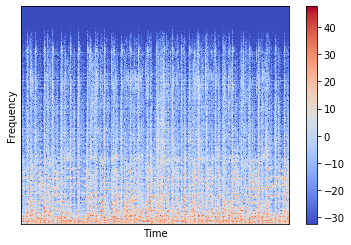

In [26]:
n_fft, hop_length = plot_STFT(signal, sr)

We can see that most of the frequencies have very low amplitude and so contributes very little to the overall sound. While we can see more contribution at **lower frequencies**, which was what we were expecting from the **power spectrum** seen before. 

It is clear how the STFT gives more information about audio data. But there exists another feature that is more important and detailed than STFT.

### Mel Frequency Cepstral Coefficients (MFCCs)

The **MFCC**s are able to capture timbral/textural aspects of sound e.g. they allow to distinguish between a piano and a violin playing the same melody. It is a **frequecy domain** feature, but the great advantage of the MFCCs is that they approximate the human auditory system. 

Basically the MFCC is a vector of **coefficients**: usually in audio application the number varies from 13 to 40 coefficients. These coefficients are calculated at each frame, so that we can have an idea of how MFCCs evolve over time. 

Let's consider our sample:

In [28]:
def plot_MFCCs(signal, n_fft, hop_length):
    MFCCs = librosa.feature.mfcc(signal, n_fft = n_fft, hop_length = hop_length, n_mfcc=13)
    librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)
    plt.xlabel("Time")
    plt.ylabel("MFCC")
    plt.colorbar()
    plt.show()

Now let's plot the sample MFCCs:

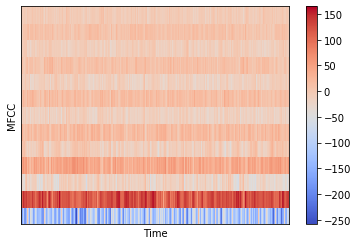

In [29]:
plot_MFCCs(signal, n_fft, hop_length)

We can see that the result is very similar to the STFT. 

MFCCs indeed are features extracted for applications like:
- Speech Recognition
- Music Genre Classification
- Music Instrument Classification
- ...

## Preparing the Dataset

In [4]:
SAMPLE_RATE = 22050
DURATION = 30 # seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION

def save_mfcc(dataset_path, json_path, n_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    # dictionary to store data
    data = {
        "mapping":[],
        "mfcc":[],
        "labels":[]
    }

    num_samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    expected_num_mfcc_vectors_per_segment = math.ceil(num_samples_per_segment / hop_length)

    # loop through all the genres

    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        # ensure that we're not at the root level
        if dirpath is not dataset_path:
            # save the semantic label
            dirpath_components = dirpath.split("\\")
            semantic_label = dirpath_components[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing {}".format(semantic_label))

            # process files for a specific genre
            for file in filenames:
                # load audio file
                file_path = os.path.join(dirpath, file)
                try:
                    signal, sr = librosa.load(file_path, sr=SAMPLE_RATE)

                    # process segments extracting mfcc and storing data
                    for s in range(num_segments):
                        start_sample = num_samples_per_segment * s
                        finish_sample = start_sample + num_samples_per_segment

                        mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
                                                sr=sr,
                                                n_fft = n_fft,
                                                n_mfcc=n_mfcc,
                                                hop_length=hop_length)

                        mfcc = mfcc.T

                        # store mfcc for segment if it has the expected length
                        if len(mfcc) == expected_num_mfcc_vectors_per_segment:
                            data["mfcc"].append(mfcc.tolist())
                            data["labels"].append(i-1)

                except Exception as ex:
                    print("An error occurred")
                    pass

    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)



In [8]:
save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)


Processing blues

Processing classical

Processing country

Processing disco

Processing hiphop

Processing jazz


c:\users\chiar\appdata\local\programs\python\python36\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


An error occurred

Processing metal

Processing pop

Processing reggae

Processing rock


Implementing a Neural Network for Genre Classification

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras


# load data
def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)

    # convert lists into numpy arrays
    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])

    return inputs, targets



def split_train_test(inputs, targets):
    inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs,
                                                                              targets,
                                                                              test_size=0.3)
    return inputs_train, inputs_test, targets_train, targets_test


def build_MLP(inputs):
    model = keras.Sequential([
        # input layer
        keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])),
        # 1st hidden layer
        keras.layers.Dense(512, activation="relu"),
        # 2nd hidden layer
        keras.layers.Dense(256, activation="relu"),
        #3rd hidden layer
        keras.layers.Dense(64, activation="relu"),
        #output layer
        keras.layers.Dense(10, activation="softmax")
    ])
    return model

  
def multilayer_perceptron_network(inputs, targets):
    inputs_train, inputs_test, targets_train, targets_test = split_train_test(inputs, targets)
    # build the network
    model = build_MLP(inputs)
    # compile network
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer= optimizer,
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    model.summary()

    # train multilayer_perceptron_network
    history = model.fit(inputs_train, targets_train,
              validation_data=(inputs_test, targets_test),
              epochs=100,
              batch_size=32)
    return history




In [10]:
CURRENT_DIR = os.path.abspath(os.getcwd())
JSON_PATH = os.path.join(os.path.join(CURRENT_DIR, "JSON"), "data.json")

inputs, targets = load_data(JSON_PATH)
history = multilayer_perceptron_network(inputs, targets)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1690)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               865792    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 1,014,218
Trainable params: 1,014,218
Non-trainable params: 0
_________________________________________________________________
Train on 6990 samples, validate on 2996 samples
Epoch 1/100
6990/6990 [==============================] - 3s 360u

Solving Overfitting for Multilayer Perceptron Network

In [11]:
import matplotlib.pyplot as plt

# plot accuracy and error over the epochs

def plot_history(history):
    fig, axs = plt.subplots(2)

    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="Train Accuracy")
    axs[0].plot(history.history["val_accuracy"], label="Test Accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy Eval")

    # create error subplot
    axs[1].plot(history.history["loss"], label="Train Error")
    axs[1].plot(history.history["val_loss"], label="Test Error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error Eval")

    plt.show()



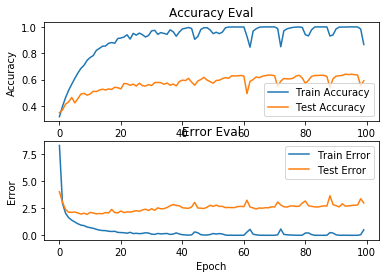

In [12]:
plot_history(history)

In [13]:
def build_MLP(inputs):
    model = keras.Sequential([
        # input layer
        keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])),
        # 1st hidden layer
        keras.layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),

        keras.layers.Dropout(0.3),

        # 2nd hidden layer
        keras.layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),

        keras.layers.Dropout(0.3),

        #3rd hidden layer
        keras.layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),

        keras.layers.Dropout(0.3),

        #output layer
        keras.layers.Dense(10, activation="softmax")
    ])
    return model 
    

# re-defining the multilayer perceptron network
def optimized_MLP(inputs, targets):
    inputs_train, inputs_test, targets_train, targets_test = split_train_test(inputs, targets)
    # build the network
    model = build_MLP(inputs)

    # compile network
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer= optimizer,
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    model.summary()

    # train multilayer_perceptron_network
    history = model.fit(inputs_train, targets_train,
              validation_data=(inputs_test, targets_test),
              epochs=100,
              batch_size=32)
    return history

In [14]:
CURRENT_DIR = os.path.abspath(os.getcwd())
JSON_PATH = os.path.join(os.path.join(CURRENT_DIR, "JSON"), "data.json")


inputs, targets = load_data(JSON_PATH)
history = optimized_MLP(inputs, targets)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 1690)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               865792    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)               

Epoch 100/100
6990/6990 [==============================] - 3s 498us/sample - loss: 1.2423 - accuracy: 0.6641 - val_loss: 1.6637 - val_accuracy: 0.5838


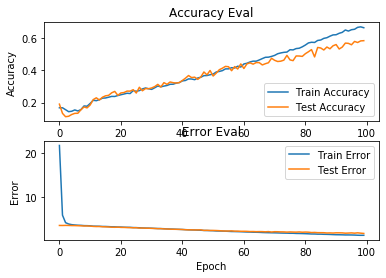

In [15]:
plot_history(history)

Convolutional Neural Network

In [19]:
# create train, validation and test sets
def prepare_datasets(test_size, validation_size, dataset_path):
    # load data
    X, y = load_data(dataset_path)

    # create train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    # create train/validation split
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # creation of 4d arrays
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test


# build the CNN network
def build_CNN(input_shape):
    # create model
    model = keras.Sequential()
    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPool2D((3,3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPool2D((3,3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPool2D((2,2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # flatten the output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

# prediction of a single sample
def predict(model, X, y):
    X = X[np.newaxis, ...]
    prediction = model.predict(X)

    # extracted index with max value
    predicted_index = np.argmax(prediction, axis=1)
    return predicted_index

def test_CNN(model, X_test, y_test):
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
    return test_loss, test_accuracy

def train_CNN(model, X_train, X_validation, y_train, y_validation):
    history = model.fit(X_train, y_train, validation_data= (X_validation, y_validation), batch_size=32, epochs=30)
    return history

def compile_CNN(model):
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer,
                  loss="sparse_categorical_crossentropy",
                  metrics=['accuracy'])
    model.summary()


def convolutional_neural_network(dataset_path):
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2, dataset_path)
    input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])
    
    # build the network
    model = build_CNN(input_shape)

    # compile the network
    compile_CNN(model)
    
    # train CNN
    history = train_CNN(model, X_train, X_validation, y_train, y_validation)
    
    # test CNN on test set
    test_loss, test_accuracy = test_CNN(model, X_test, y_test)

    # take a single sample
    x_sample = X_test[100]
    y_sample = y_test[100]

    # prediction on a single sample
    predicted_index = predict(model, x_sample, y_sample)
    prediction = (predicted_index, y_sample)

    return history, test_loss, test_accuracy, prediction

In [20]:
CURRENT_DIR = os.path.abspath(os.getcwd())
JSON_PATH = os.path.join(os.path.join(CURRENT_DIR, "JSON"), "data.json")

history, test_loss, test_accuracy, prediction = convolutional_neural_network(JSON_PATH)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 11, 32)       320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 6, 32)         0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 64, 6, 32)         128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 62, 4, 32)         9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 2, 32)         0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 31, 2, 32)         128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 1, 32)        

In [21]:
print("Accuracy on test set is: {}".format(test_accuracy))
print("Loss on test set is: {}".format(test_loss))
print("Expected index: {}, Predicted index: {}".format(prediction[1], prediction[0]))

Accuracy on test set is: 0.7076491713523865
Loss on test set is: 0.8316834049316516
Expected index: 2, Predicted index: [2]


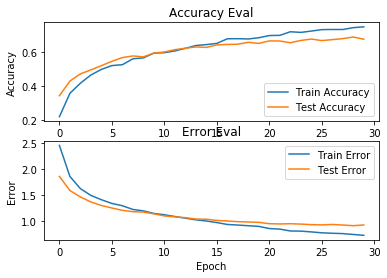

In [22]:
plot_history(history)


Recurrent Neural Network

In [25]:
# create train, validation and test sets
def prepare_datasets(test_size, validation_size, dataset_path):
    # load data
    X, y = load_data(dataset_path)

    # create train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    # create train/validation split
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    return X_train, X_validation, X_test, y_train, y_validation, y_test


# build the RNN network
def build_RNN(input_shape):
    # create model
    model = keras.Sequential()

    # 2 LSTM layers
    model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(keras.layers.LSTM(64))
    
    # dense layer
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))
    
    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model


def test_RNN(model, X_test, y_test):
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
    return test_loss, test_accuracy


def train_RNN(model, X_train, X_validation, y_train, y_validation):
    history = model.fit(X_train, y_train, validation_data= (X_validation, y_validation), batch_size=32, epochs=30)
    return history


def compile_RNN(model):
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer,
                  loss="sparse_categorical_crossentropy",
                  metrics=['accuracy'])
    model.summary()

def recurrent_neural_network(dataset_path):
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2, dataset_path)
    input_shape = (X_train.shape[1], X_train.shape[2])
    
    # build the network
    model = build_RNN(input_shape)

    # compile the network
    compile_RNN(model)
    
    # train CNN
    history = train_RNN(model, X_train, X_validation, y_train, y_validation)

    # test CNN
    test_loss, test_accuracy = test_RNN(model, X_test, y_test)
    
    return history, test_loss, test_accuracy

In [26]:
CURRENT_DIR = os.path.abspath(os.getcwd())
JSON_PATH = os.path.join(os.path.join(CURRENT_DIR, "JSON"), "data.json")

history, test_loss, test_accuracy = recurrent_neural_network(JSON_PATH)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 130, 64)           19968     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                650       
Total params: 57,802
Trainable params: 57,802
Non-trainable params: 0
_________________________________________________________________
Train on 5991 samples, validate on 1498 samples
Epoch 1/30
5991/5991 [==============================] - 27s 5ms/samp

In [27]:
print("Accuracy on test set is: {}".format(test_accuracy))
print("Loss on test set is: {}".format(test_loss))

Accuracy on test set is: 0.6075290441513062
Loss on test set is: 1.1577355222889172


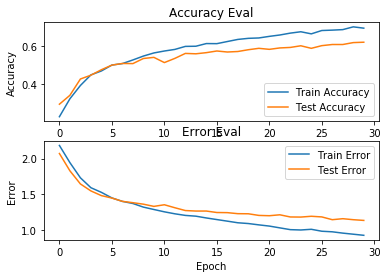

In [28]:
plot_history(history)